# Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Density Function

The **standard normal distribution** is given by the probability density function

$$
f(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}
$$

The coefficient $\frac{1}{\sqrt{2 \pi}}$ comes from the integral formula

$$
\int_0^{\infty} e^{-x^2} dx = \frac{\sqrt{\pi}}{2}
$$

If we scale the function by $1/\sigma$ and shift by $\mu$ we get the **normal distribution** with mean $\mu$ and variance $\sigma^2$

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x - \mu)^2/2\sigma^2}
$$

We denote the normal distribution by $N(\mu,\sigma^2)$. Let's plot the normal distrbution for different values of the mean $\mu$. Increasing the value $\mu$ simply shifts the curve to the right.

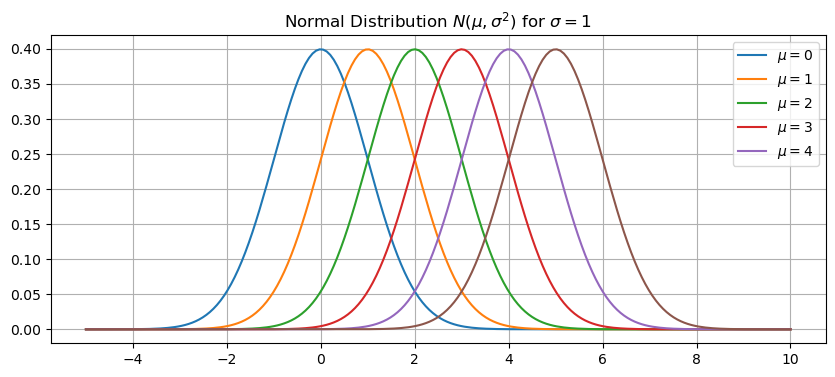

In [28]:
normal = lambda x,mu,sigma: 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))
x = np.linspace(-5,10,200)

plt.figure(figsize=(10,4))
for mu in range(0,6):
    y = normal(x,mu,1)
    plt.plot(x,y)
plt.title('Normal Distribution $N(\mu,\sigma^2)$ for $\sigma=1$')
plt.legend(['$\mu=0$','$\mu=1$','$\mu=2$','$\mu=3$','$\mu=4$'])
plt.grid(True)
plt.show()

Let's plot the normal distrbution for different values of the variance $\sigma^2$. Increasing the value $\sigma^2$ flattens and widens the curve.

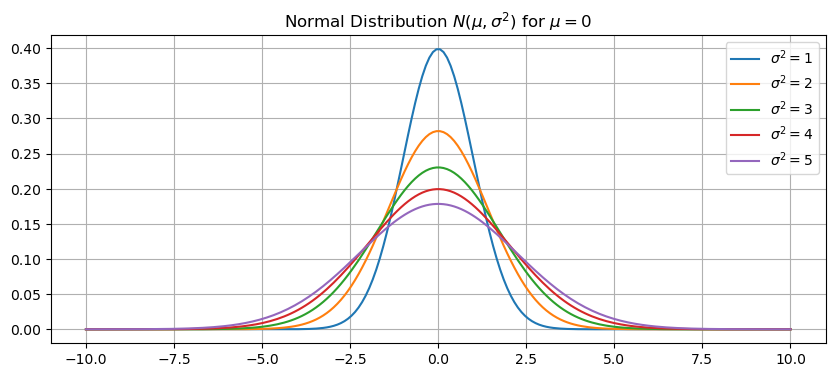

In [29]:
x = np.linspace(-10,10,200)
plt.figure(figsize=(10,4))
for sigma2 in range(1,6):
    sigma = np.sqrt(sigma2)
    y = normal(x,0,sigma)
    plt.plot(x,y)
plt.title('Normal Distribution $N(\mu,\sigma^2)$ for $\mu=0$')
plt.legend(['$\sigma^2=1$','$\sigma^2=2$','$\sigma^2=3$','$\sigma^2=4$','$\sigma^2=5$'])
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) for more information.
:::

## Example: Temperature Distribution

The file `temperature.csv` consists of daily average temperature measured at the Vancouver Airport from 1995 to 2023. Let's import the data, look the first few rows and then plot the average tempearture versus day of the year.

In [30]:
df = pd.read_csv('temperature.csv')

In [31]:
df.head()

,day,month,year,dayofyear,avg_temperature
0,13,4,2023,103,7.10
1,12,4,2023,102,5.19
2,11,4,2023,101,8.00
3,10,4,2023,100,7.69
4,9,4,2023,99,9.30


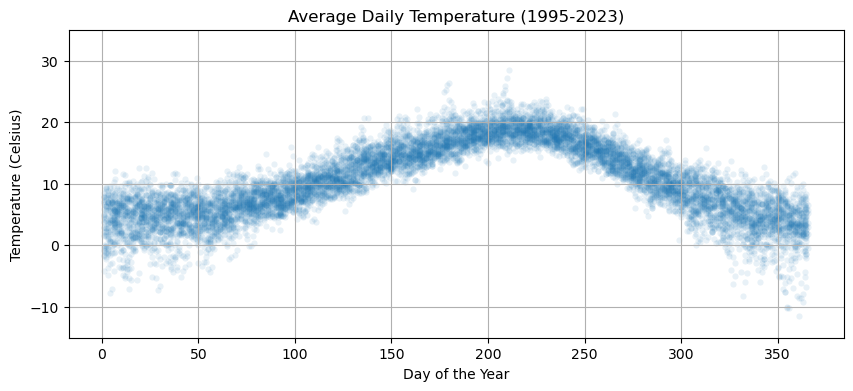

In [54]:
df.plot('dayofyear','avg_temperature',kind='scatter',alpha=0.1,lw=0,figsize=(10,4))
plt.ylim([-15,35])
plt.xlabel('Day of the Year'), plt.ylabel('Temperature (Celsius)')
plt.title('Average Daily Temperature (1995-2023)')
plt.grid(True)
plt.show()

The temperature varies over the course of the year. Let's look at the distribution of temperatures in July.

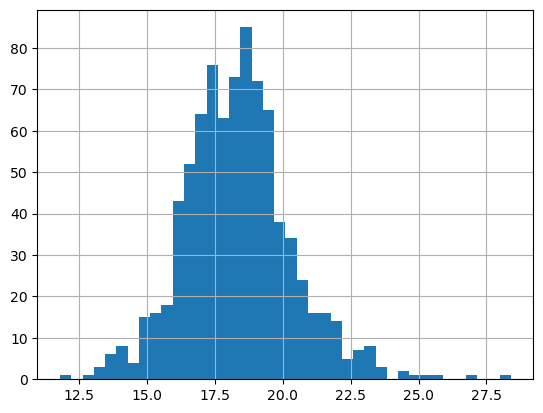

In [75]:
temp7 = df[df['month'] == 7]['avg_temperature']
temp7.hist(bins=40)
plt.show()

Let's compute the sample mean $\hat{\mu}$ and sample varaince $\hat{\sigma}^2$ and then plot the corresponding normal distribution $N(\hat{\mu},\hat{\sigma}^2)$.

In [68]:
mu = temp7.mean()
sigma2 = temp7.var()
print('mean =',mu,', variance =',sigma2)

mean = 18.33942652329749 , variance = 4.003297756855481


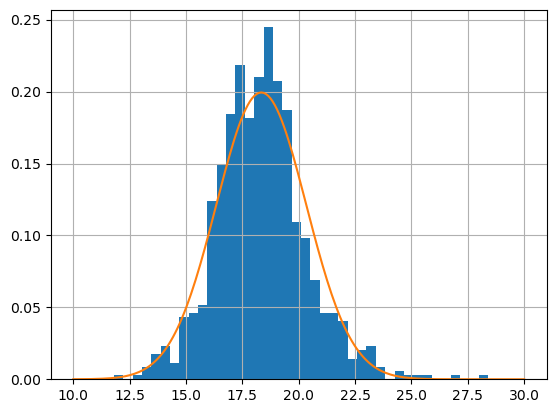

In [69]:
temp7.hist(bins=40,density=True)
x = np.linspace(10,30,200)
y = normal(x,mu,sigma2**.5)
plt.plot(x,y)
plt.show()